
Word Movers' Distance
=====================

Jay Urbain, PhD

Demonstrates using Gensim's implemenation of the WMD. Additional experiments with questions.

References:   

Matt Kusner et al. From Word Embeddings To Document Distances  
http://jmlr.org/proceedings/papers/v37/kusnerb15.pdf

Gensim WMD Tutorial    
https://radimrehurek.com/gensim/auto_examples/tutorials/run_wmd.html
        

#### Installation

pip install gensim

pip install nltk

WMD
------

WMD enables us to assess the "distance" between two documents in a meaningful
way, even when they have no words in common. Uses `word2vec` vector embeddings of
words. It has been shown to outperform many of the state-of-the-art methods in
*k*-nearest neighbors classification.

WMD is illustrated below for two similar sentences (illustration taken
from `Vlad Niculae's` blog: http://vene.ro/blog/word-movers-distance-in-python.html 

The sentences have no words in common, but by matching the relevant words, WMD is able to
accurately measure the (dis)similarity between the two sentences. The method
 uses the bag-of-words representation of the documents (word's frequencies in the documents), noted as $d$ in the figure below. 

The intuition behind the method is that we find the minimum "traveling distance"
between documents, in other words, the most efficient way to "move" the
distribution of document 1 to the distribution of document 2.


In [4]:
%matplotlib inline

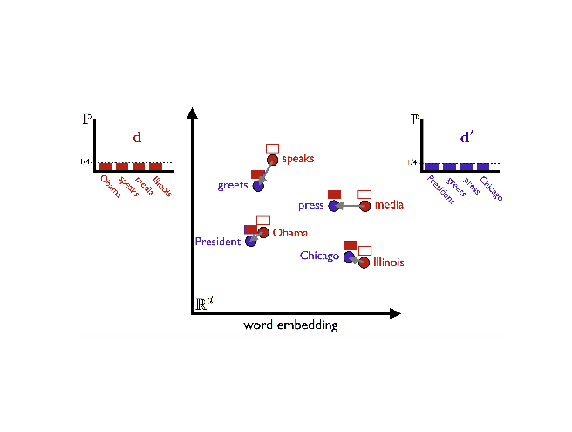

In [6]:
# Image from https://vene.ro/images/wmd-obama.png
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(10,10))
img = mpimg.imread('wmd-obama.png')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

Gensim's WMD functionality consists of the `wmdistance` method for distance computation, and the
`WmdSimilarity` class for corpus based similarity queries.


Computing the Word Mover's Distance
---------------------------------------------

To use WMD, you need word embeddings.

The original WMD method and gensim's implementation use word2vec.


In [7]:
# Initialize logging.
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

sentence_obama = 'Obama speaks to the media in Illinois'
sentence_president = 'The president greets the press in Chicago'

In [3]:
#!pip install nltk

These sentences have very similar content, and as such the WMD should be low.
Before we compute the WMD, we want to remove stopwords ("the", "to", etc.),
as these do not contribute a lot to the information in the sentences.




In [8]:
# Import and download stopwords from NLTK.
from nltk.corpus import stopwords
from nltk import download
download('stopwords')  # Download stopwords list.
stop_words = stopwords.words('english')

def preprocess(sentence):
    return [w for w in sentence.lower().split() if w not in stop_words]

sentence_obama = preprocess(sentence_obama)
sentence_president = preprocess(sentence_president)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jayurbain/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Load word embeddings

In [9]:
import gensim.downloader as api
model = api.load('word2vec-google-news-300')

2020-03-11 12:49:07,498 : INFO : loading projection weights from /Users/jayurbain/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz
2020-03-11 12:51:50,995 : INFO : loaded (3000000, 300) matrix from /Users/jayurbain/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz


In [10]:
#!pip install pyemd

Compute WMD using the ``wmdistance`` method.


In [11]:
distance = model.wmdistance(sentence_obama, sentence_president)
print('distance = %.4f' % distance)

2020-03-11 12:51:51,011 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-03-11 12:51:51,013 : INFO : built Dictionary(8 unique tokens: ['illinois', 'media', 'obama', 'speaks', 'chicago']...) from 2 documents (total 8 corpus positions)


distance = 3.3741


Let's try the same thing with two completely unrelated sentences. Notice that the distance is larger.




In [12]:
sentence_orange = preprocess('Oranges are my favorite fruit')
distance = model.wmdistance(sentence_obama, sentence_orange)
print('distance = %.4f' % distance)

2020-03-11 12:51:51,024 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-03-11 12:51:51,025 : INFO : built Dictionary(7 unique tokens: ['illinois', 'media', 'obama', 'speaks', 'favorite']...) from 2 documents (total 7 corpus positions)


distance = 4.3802


More challenging questions testing similar words with different meaning, and disimilar words with similar meaning

In [13]:
q1 = "Where do you live"
q2 = "What is your address"
q3 = "What is your name"
q4 = "Where is your home"

q1 = preprocess(q1)
q2 = preprocess(q2)
q3 = preprocess(q3)
q4 = preprocess(q4)

messages = [q1,q2,q3,q4]

In [14]:
model.wmdistance(q1, q1)

2020-03-11 12:51:51,044 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-03-11 12:51:51,045 : INFO : built Dictionary(1 unique tokens: ['live']) from 2 documents (total 2 corpus positions)


0.0

In [15]:
for i in range( len(messages) ):
  for j in range( len(messages) ):
    if i != j:
      print(messages[i], messages[j], model.wmdistance(messages[i], messages[j]) )

2020-03-11 12:51:51,058 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-03-11 12:51:51,059 : INFO : built Dictionary(2 unique tokens: ['live', 'address']) from 2 documents (total 2 corpus positions)
2020-03-11 12:51:51,061 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-03-11 12:51:51,062 : INFO : built Dictionary(2 unique tokens: ['live', 'name']) from 2 documents (total 2 corpus positions)
2020-03-11 12:51:51,064 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-03-11 12:51:51,066 : INFO : built Dictionary(2 unique tokens: ['live', 'home']) from 2 documents (total 2 corpus positions)
2020-03-11 12:51:51,068 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-03-11 12:51:51,069 : INFO : built Dictionary(2 unique tokens: ['address', 'live']) from 2 documents (total 2 corpus positions)
2020-03-11 12:51:51,073 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-03-11 12:51:51,074 : INFO : built Dict

['live'] ['address'] 3.1615443229675293
['live'] ['name'] 3.352797031402588
['live'] ['home'] 2.71511173248291
['address'] ['live'] 3.1615443229675293
['address'] ['name'] 3.0873148441314697
['address'] ['home'] 3.1367220878601074
['name'] ['live'] 3.352797031402588
['name'] ['address'] 3.0873148441314697
['name'] ['home'] 3.112905263900757
['home'] ['live'] 2.71511173248291
['home'] ['address'] 3.1367220878601074
['home'] ['name'] 3.112905263900757


Normalizing word2vec vectors
-----------------------------------

When using the ``wmdistance`` method, it is beneficial to normalize the
word2vec vectors first, so they all have equal length. To do this, simply
call ``model.init_sims(replace=True)`` and Gensim will take care of that for
you.

Usually, one measures the distance between two word2vec vectors using the
cosine distance (see `cosine similarity
<https://en.wikipedia.org/wiki/Cosine_similarity>`_\ ), which measures the
angle between vectors. WMD, on the other hand, uses the Euclidean distance.
The Euclidean distance between two vectors might be large because their
lengths differ, but the cosine distance is small because the angle between
them is small; we can mitigate some of this by normalizing the vectors.

Note that normalizing the vectors can take some time, especially if you have
  a large vocabulary and/or large vectors.


In [16]:
model.init_sims(replace=True)  # Normalizes the vectors in the word2vec class.

distance = model.wmdistance(sentence_obama, sentence_president)  # Compute WMD as normal.
print('distance: %r' % distance)

distance = model.wmdistance(sentence_obama, sentence_orange)
print('distance = %.4f' % distance)

distance = model.wmdistance(sentence_obama, sentence_obama)
print('distance = %.4f' % distance)

2020-03-11 12:51:51,107 : INFO : precomputing L2-norms of word weight vectors
2020-03-11 12:51:58,163 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-03-11 12:51:58,164 : INFO : built Dictionary(8 unique tokens: ['illinois', 'media', 'obama', 'speaks', 'chicago']...) from 2 documents (total 8 corpus positions)
2020-03-11 12:51:58,165 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-03-11 12:51:58,166 : INFO : built Dictionary(7 unique tokens: ['illinois', 'media', 'obama', 'speaks', 'favorite']...) from 2 documents (total 7 corpus positions)
2020-03-11 12:51:58,168 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-03-11 12:51:58,169 : INFO : built Dictionary(4 unique tokens: ['illinois', 'media', 'obama', 'speaks']) from 2 documents (total 8 corpus positions)


distance: 1.0174646259300113
distance = 1.3663
distance = 0.0000


Additional References
-------------------------

1. Ofir Pele and Michael Werman, *A linear time histogram metric for improved SIFT matching, 2008.
2. Ofir Pele and Michael Werman, *Fast and robust earth mover's distances, 2009.
3. Matt Kusner et al. *From Embeddings To Document Distances, 2015.
4. Thomas Mikolov et al. *Efficient Estimation of Word Representations in Vector Space, 2013.


